## 1. SVD on linear regression (least square approximation)

The least squares solution $\tilde{x}$ for the linear regression problem can be expressed as:
$\tilde{x} = V^T \left( \Sigma^{-1} \right) U^T b$

Where:
- $\tilde{x}$ is the vector representing the coefficients of the regression line.
- $V^T$ is the transpose of the right singular matrix.
- $\Sigma^{-1}$ represents the inverse of the diagonal matrix $\Sigma$, obtained by taking the reciprocal of its non-zero elements.
- $U^T$ is the transpose of the left singular matrix.
- $b$ is the vector representing the noisy measurements.

This formula represents the mathematical expression of the least squares regression calculation using the singular value decomposition.

(The <a href='#ref1'>Derivation</a> of the formula has been put in the last section of this notebook.)

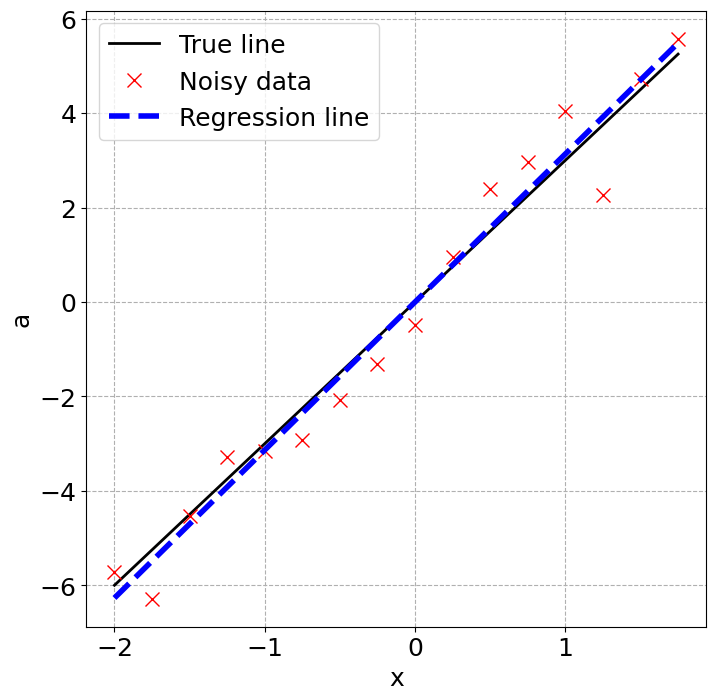

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# In this problem, ax mimics as the predicted values, and b mimics as the observed values.
# a is a vector of y-coordinates, and x is the true slope.
# x is the vector of x-coordinates that we want to estimate.

a = 3 # True slope

# In 2D plots scenario, we project y-coordinates to x-coordinates. So our A is just a 2x1 vector.
x = np.arange(-2,2,0.25)
x = x.reshape(-1, 1)

b = a*x + np.random.randn(*x.shape) # Add noise

plt.plot(x, a*x, color='k', linewidth=2, label='True line') # True relationship
plt.plot(x, b, 'x', color='r', markersize = 10, label='Noisy data') # Noisy measurements

U, S, VT = np.linalg.svd(x,full_matrices=False)
atilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # Least-square fit

plt.plot(x,atilde * x,'--',color='b',linewidth=4, label='Regression line')

plt.xlabel('x')
plt.ylabel('a')

plt.grid(linestyle='--')
plt.legend()
plt.show()


Interestingly, we can apply the same line `atilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b` to obtain a fitting line to time series problems. 

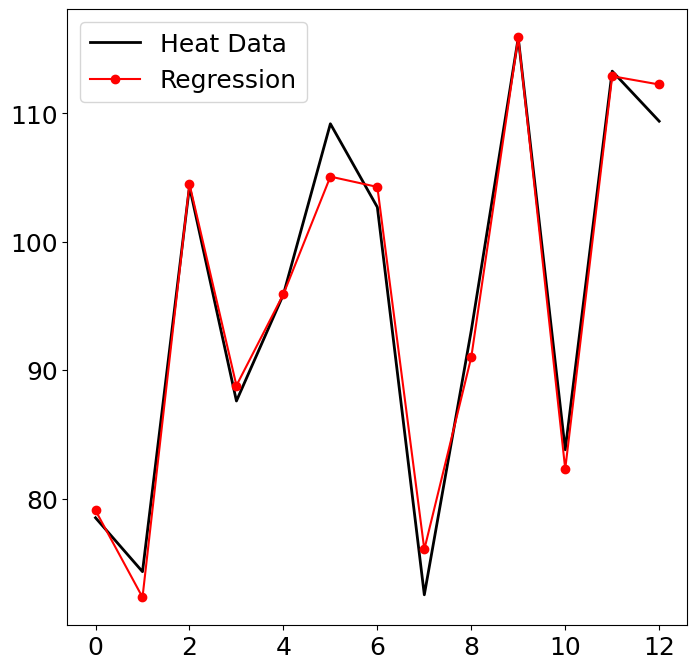

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# Load dataset
A = np.loadtxt(os.path.join('..','DATA','hald_ingredients.csv'),delimiter=',')
b = np.loadtxt(os.path.join('..','DATA','hald_heat.csv'),delimiter=',')

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

plt.plot(b, color='k', linewidth=2, label='Heat Data') # True relationship
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.legend()
plt.show()

# Appendix: Deviations 

## Derivation for the $\tilde{x}$ used in linear regression problems <a id='ref1'></a>

Given the SVD of matrix $A$: $A = U \Sigma V^T$

Where:
- $A$ is the input data matrix,
- $U$ is the left singular matrix,
- $\Sigma$ is a diagonal matrix containing the singular values,
- $V^T$ is the transpose of the right singular matrix.

  

The linear regression problem can be formulated as finding coefficients $\mathbf{x}$ such that the residual sum of squares is minimized: $\underset{x}{argmin} \, \| A\mathbf{x} - \mathbf{b} \|_2^2$,
- where $Ax$ represents the predicted values (from linear regression model represented by $Ax$), and the actual observed values $b$.

Expanding this, we get:
$\| A\mathbf{x} - \mathbf{b} \|_2^2 = (A\mathbf{x} - \mathbf{b})^T (A\mathbf{x} - \mathbf{b})$
- In the context of the least squares problem, this dot product quantifies the squared Euclidean norm of the difference vector $Ax - b$.


Substituting $A = U \Sigma V^T$, we have:
$\| U \Sigma V^T \mathbf{x} - \mathbf{b} \|_2^2 = (U \Sigma V^T \mathbf{x} - \mathbf{b})^T (U \Sigma V^T \mathbf{x} - \mathbf{b})$


Since $U$ and $V^T$ are orthogonal matrices (i.e., $U^T U = I$ and $V^T V = I$), they do not affect the Euclidean norm. Therefore, we can simplify this expression to:

$\| \Sigma V^T \mathbf{x} - U^T \mathbf{b} \|_2^2 = (\Sigma V^T \mathbf{x} - U^T \mathbf{b})^T (\Sigma V^T \mathbf{x} - U^T \mathbf{b})$

Let $\mathbf{y} = V^T \mathbf{x}$. Then, the problem becomes $\underset{y}{\text{argmin}} \| \Sigma \mathbf{y} - U^T \mathbf{b} \|_2^2$

$\| \Sigma \mathbf{y} - U^T \mathbf{b} \|_2^2 = (\Sigma \mathbf{y} - U^T \mathbf{b})^T (\Sigma \mathbf{y} - U^T \mathbf{b})$

Expanding this expression, we have:

$\| \Sigma \mathbf{y} - U^T \mathbf{b} \|_2^2 = \sum_{i=1}^{n} (\sigma_i y_i - u_i^T \mathbf{b})^2$
where $\sigma_i$ are the singular values, and $u_i$ are the columns of $U$. The goal is to minimize this expression with respect to $\mathbf{y}$.

The solution to this problem is obtained by setting the derivative of $\| \Sigma \mathbf{y} - U^T \mathbf{b} \|_2^2$ with respect to $\mathbf{y}$ to zero. Solving the resulting equations gives the optimal values for $\mathbf{y}$.

Finally, once $\mathbf{y}$ is obtained, we can find $\mathbf{x}$ using $\mathbf{x} = V \mathbf{y}$.

---
Transitions of `argmin` notation in the problem

- 1.  $\underset{x}{argmin} \, \| A\mathbf{x} - \mathbf{b} \|_2^2$ becomes $\underset{y}{argmin} \| \Sigma \mathbf{y} - U^T \mathbf{b} \|_2^2$ in the step of introducing $\mathbf{y} = V^T \mathbf{x}$.
- 2. In expanded form, we can also express our optimization problem as: $\underset{x_1, x_2, \ldots, x_n}{\text{argmin}} \, \sum_{i=1}^{m} (a_{i1}x_1 + a_{i2}x_2 + \ldots + a_{in}x_n - b_i)^2$ in the beginning, or $\underset{y_1, y_2, \ldots, y_n}{\text{argmin}} \sum_{i=1}^{n} (\sigma_i y_i - u_i^T \mathbf{b})^2$ at the end.

Now we have the following minimization problem:

$\underset{y}{\text{argmin}} \, \| \Sigma \mathbf{y} - U^T \mathbf{b} \|_2^2$

This can be expanded to:

$\underset{y}{\text{argmin}} \, \sum_{i=1}^{n} (\sigma_i y_i - u_i^T \mathbf{b})^2$

The solution to this problem is obtained by setting the derivative of $\| \Sigma \mathbf{y} - U^T \mathbf{b} \|_2^2$ with respect to $\mathbf{y}$ to zero. The gradient of this function is:

$\frac{\partial}{\partial y} \| \Sigma y - U^T b \|_2^2 = 2 \Sigma^T (\Sigma y - U^T b)$

Setting this to zero gives:

$\Sigma^T (\Sigma y - U^T b) = 0$

Multiplying through by $\Sigma^{-T}$, remembering that $\Sigma$ is a diagonal matrix and so $\Sigma^T = \Sigma$ and $\Sigma^{-T} = \Sigma^{-1}$, yields:

$\Sigma y - U^T b = 0$

Then, solving for $y$ gives:

$\Sigma y = U^T b$

$y = \Sigma^{-1} U^T b$

Remember, we earlier defined $y = V^T x$, so we can substitute this back into the above equation to solve for $x$:

$V^T x = \Sigma^{-1} U^T b$

Finally, multiplying through by $V$ (since $V^T V = I$), we get:

$x = V \Sigma^{-1} U^T b$

So, the coefficients $\mathbf{x}$ that minimize the residual sum of squares in the original linear regression problem are given by this formula. Note that this assumes full rank of $A$ (so that $\Sigma^{-1}$ exists). In practice, the SVD is often used to calculate the pseudoinverse of $A$ for linear regression, which handles the case where $A$ is not full rank.

---

This derivation shows how the least squares solution in linear regression can be derived using Singular Value Decomposition. The formula $\tilde{x} = V^T \left( \Sigma^{-1} \right) U^T \mathbf{b}$ represents the optimal coefficients for the regression line.